# 10 minutes to pandas

This is a short introduction to pandas, geared mainly for new users. You can see more complex recipes in the [Cookbook.](https://pandas.pydata.org/docs/user_guide/cookbook.html#cookbook)

Customarily, we import as follows:

In [1]:
import numpy as np

In [2]:
import pandas as pd

## Obejct creation

See the [Data Structure Intro section](https://pandas.pydata.org/docs/user_guide/dsintro.html#dsintro).

Creating a [`Series`](https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series) by passing a list of values, letting pandas create a default integer index:

In [3]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])

In [4]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) by passing a NumPy array, with a datetime index and labeled columns:

In [5]:
dates = pd.date_range("20130101", periods=6)

In [6]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [7]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))

In [8]:
df

,A,B,C,D
2013-01-01,0.846156,0.212553,0.172670,-0.273450
2013-01-02,-0.589106,-1.021788,-0.607472,0.520609
2013-01-03,0.006424,-0.818961,-0.125689,0.432668
2013-01-04,-1.516724,0.003819,-0.258474,0.450676
2013-01-05,-0.142798,-0.549636,-0.068036,0.424656
2013-01-06,-0.265571,-0.208496,-1.397091,0.818086


Creating a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) by passing a dict of objects that can be converted to series-like.

In [9]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)

In [10]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


The columns of the resulting [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) have different [dtypes](https://pandas.pydata.org/docs/user_guide/basics.html#basics-dtypes).

In [11]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

If you’re using IPython, tab completion for column names (as well as public attributes) is automatically enabled. Here’s a subset of the attributes that will be completed:

In [12]:
%%capture
df2.<TAB>  # noqa: E225, E999
df2.A                  df2.bool
df2.abs                df2.boxplot
df2.add                df2.C
df2.add_prefix         df2.clip
df2.add_suffix         df2.columns
df2.align              df2.copy
df2.all                df2.count
df2.any                df2.combine
df2.append             df2.D
df2.apply              df2.describe
df2.applymap           df2.diff
df2.B                  df2.duplicated

SyntaxError: invalid syntax (<ipython-input-12-e550f04c16f1>, line 1)

As you can see, the columns `A`, `B`, `C`, and `D` are automatically tab completed. `E` and `F` are there as well; the rest of the attributes have been truncated for brevity.

## Viewing data

See the [Basics section](https://pandas.pydata.org/docs/user_guide/basics.html#basics).

Here is how to view the top and bottom rows of the frame:

In [13]:
df.head()

,A,B,C,D
2013-01-01,0.846156,0.212553,0.172670,-0.273450
2013-01-02,-0.589106,-1.021788,-0.607472,0.520609
2013-01-03,0.006424,-0.818961,-0.125689,0.432668
2013-01-04,-1.516724,0.003819,-0.258474,0.450676
2013-01-05,-0.142798,-0.549636,-0.068036,0.424656


In [14]:
df.tail(3)

,A,B,C,D
2013-01-04,-1.516724,0.003819,-0.258474,0.450676
2013-01-05,-0.142798,-0.549636,-0.068036,0.424656
2013-01-06,-0.265571,-0.208496,-1.397091,0.818086


Display the index, columns:

In [15]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [16]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

[`DataFrame.to_numpy()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy) gives a NumPy representation of the underlying data. Note that this can be an expensive operation when your DataFrame has columns with different data types, which comes down to a fundamental difference between pandas and NumPy: **NumPy arrays have one dtype for the entire array, while pandas DataFrames have one dtype per column.** When you call [`DataFrame.to_numpy()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy), pandas will find the NumPy dtype that can hold all of the dtypes in the DataFrame. This may end up being `object`, which requires casting every value to a Python object.

For `df`, our DataFrame of all floating-point values, [`DataFrame.to_numpy()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy) is fast and doesn’t require copying data.

In [17]:
df.to_numpy()

array([[ 0.84615626,  0.21255286,  0.17267018, -0.27345034],
       [-0.58910617, -1.02178833, -0.60747236,  0.52060946],
       [ 0.00642416, -0.81896079, -0.125689  ,  0.43266837],
       [-1.5167244 ,  0.003819  , -0.25847408,  0.45067602],
       [-0.14279794, -0.5496361 , -0.068036  ,  0.42465577],
       [-0.26557085, -0.20849604, -1.39709092,  0.81808561]])

For `df2`, the [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) with multiple dtypes, [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy).to_numpy() is relatively expensive.

In [18]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

> #### Note
> [`DataFrame.to_numpy()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy) does not include the index or column labels in the output.

[`describe()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe) shows a quick statistic summary of your data:

In [19]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.276936,-0.397085,-0.380682,0.395541
std,0.773857,0.481550,0.560076,0.359723
min,-1.516724,-1.021788,-1.397091,-0.273450
25%,-0.508222,-0.751630,-0.520223,0.426659
50%,-0.204184,-0.379066,-0.192082,0.441672
75%,-0.030881,-0.049260,-0.082449,0.503126
max,0.846156,0.212553,0.172670,0.818086


Transposing your data:

In [20]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,0.846156,-0.589106,0.006424,-1.516724,-0.142798,-0.265571
B,0.212553,-1.021788,-0.818961,0.003819,-0.549636,-0.208496
C,0.172670,-0.607472,-0.125689,-0.258474,-0.068036,-1.397091
D,-0.273450,0.520609,0.432668,0.450676,0.424656,0.818086


Sorting by an axis:

In [21]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.273450,0.172670,0.212553,0.846156
2013-01-02,0.520609,-0.607472,-1.021788,-0.589106
2013-01-03,0.432668,-0.125689,-0.818961,0.006424
2013-01-04,0.450676,-0.258474,0.003819,-1.516724
2013-01-05,0.424656,-0.068036,-0.549636,-0.142798
2013-01-06,0.818086,-1.397091,-0.208496,-0.265571


Sorting by values:

In [22]:
df.sort_values(by="B")

,A,B,C,D
2013-01-02,-0.589106,-1.021788,-0.607472,0.520609
2013-01-03,0.006424,-0.818961,-0.125689,0.432668
2013-01-05,-0.142798,-0.549636,-0.068036,0.424656
2013-01-06,-0.265571,-0.208496,-1.397091,0.818086
2013-01-04,-1.516724,0.003819,-0.258474,0.450676
2013-01-01,0.846156,0.212553,0.172670,-0.273450


## Selection

> #### Note
> While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, `.at`, `.iat`, `.loc` and `.iloc`.

See the indexing documentation [Indexing and Selecting Data](https://pandas.pydata.org/docs/user_guide/indexing.html#indexing) and [MultiIndex / Advanced Indexing](https://pandas.pydata.org/docs/user_guide/advanced.html#advanced).

### Getting

Selecting a single column, which yields a [`Series`](https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series), equivalent to `df.A`:

In [23]:
df["A"]

2013-01-01    0.846156
2013-01-02   -0.589106
2013-01-03    0.006424
2013-01-04   -1.516724
2013-01-05   -0.142798
2013-01-06   -0.265571
Freq: D, Name: A, dtype: float64

Selecting via `[]`, which slices the rows.

In [24]:
df[0:3]

,A,B,C,D
2013-01-01,0.846156,0.212553,0.172670,-0.273450
2013-01-02,-0.589106,-1.021788,-0.607472,0.520609
2013-01-03,0.006424,-0.818961,-0.125689,0.432668


In [25]:
df["20130102":"20130104"]

,A,B,C,D
2013-01-02,-0.589106,-1.021788,-0.607472,0.520609
2013-01-03,0.006424,-0.818961,-0.125689,0.432668
2013-01-04,-1.516724,0.003819,-0.258474,0.450676


### Selection by label

See more in [Selection by Label](https://pandas.pydata.org/docs/user_guide/indexing.html#indexing-label).

For getting a cross section using a label:

In [26]:
df.loc[dates[0]]

A    0.846156
B    0.212553
C    0.172670
D   -0.273450
Name: 2013-01-01 00:00:00, dtype: float64

Selecting on a multi-axis by label:

In [27]:
df.loc[:, ["A", "B"]]

,A,B
2013-01-01,0.846156,0.212553
2013-01-02,-0.589106,-1.021788
2013-01-03,0.006424,-0.818961
2013-01-04,-1.516724,0.003819
2013-01-05,-0.142798,-0.549636
2013-01-06,-0.265571,-0.208496


Showing label slicing, both endpoints are *included*:

In [28]:
df.loc["20130102":"20130104", ["A", "B"]]

,A,B
2013-01-02,-0.589106,-1.021788
2013-01-03,0.006424,-0.818961
2013-01-04,-1.516724,0.003819


Reduction in the dimensions of the returned object:

In [29]:
df.loc["20130102", ["A", "B"]]

A   -0.589106
B   -1.021788
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value:

In [30]:
df.loc[dates[0], "A"]

0.8461562636132912

For getting fast access to a scalar (equivalent to the prior method):

In [31]:
df.at[dates[0], "A"]

0.8461562636132912

### Selection by position

See more in [Selection by Position](https://pandas.pydata.org/docs/user_guide/indexing.html#indexing-integer).

Select via the position of the passed integers:

In [32]:
df.iloc[3]

A   -1.516724
B    0.003819
C   -0.258474
D    0.450676
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to numpy/Python:

In [33]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-1.516724,0.003819
2013-01-05,-0.142798,-0.549636


By lists of integer position locations, similar to the NumPy/Python style:

In [34]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-0.589106,-0.607472
2013-01-03,0.006424,-0.125689
2013-01-05,-0.142798,-0.068036


For slicing rows explicitly:

In [35]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-0.589106,-1.021788,-0.607472,0.520609
2013-01-03,0.006424,-0.818961,-0.125689,0.432668


For slicing columns explicitly:

In [36]:
df.iloc[:, 1:3]

,B,C
2013-01-01,0.212553,0.172670
2013-01-02,-1.021788,-0.607472
2013-01-03,-0.818961,-0.125689
2013-01-04,0.003819,-0.258474
2013-01-05,-0.549636,-0.068036
2013-01-06,-0.208496,-1.397091


For getting a value explicitly:

In [37]:
df.iloc[1, 1]

-1.0217883271856274

For getting fast access to a scalar (equivalent to the prior method):

In [38]:
df.iat[1, 1]

-1.0217883271856274

### Boolean indexing

Using a single column’s values to select data.

In [39]:
df[df["A"] > 0]

,A,B,C,D
2013-01-01,0.846156,0.212553,0.172670,-0.273450
2013-01-03,0.006424,-0.818961,-0.125689,0.432668


Selecting values from a DataFrame where a boolean condition is met.

In [40]:
df[df > 0]

,A,B,C,D
2013-01-01,0.846156,0.212553,0.17267,NaN
2013-01-02,NaN,NaN,NaN,0.520609
2013-01-03,0.006424,NaN,NaN,0.432668
2013-01-04,NaN,0.003819,NaN,0.450676
2013-01-05,NaN,NaN,NaN,0.424656
2013-01-06,NaN,NaN,NaN,0.818086


Using the [`isin()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.isin.html#pandas.Series.isin) method for filtering:

In [41]:
df2 = df.copy()

In [42]:
df2["E"] = ["one", "one", "two", "three", "four", "three"]

In [43]:
df2

,A,B,C,D,E
2013-01-01,0.846156,0.212553,0.172670,-0.273450,one
2013-01-02,-0.589106,-1.021788,-0.607472,0.520609,one
2013-01-03,0.006424,-0.818961,-0.125689,0.432668,two
2013-01-04,-1.516724,0.003819,-0.258474,0.450676,three
2013-01-05,-0.142798,-0.549636,-0.068036,0.424656,four
2013-01-06,-0.265571,-0.208496,-1.397091,0.818086,three


In [44]:
df2[df2["E"].isin(["two", "four"])]

,A,B,C,D,E
2013-01-03,0.006424,-0.818961,-0.125689,0.432668,two
2013-01-05,-0.142798,-0.549636,-0.068036,0.424656,four


### Setting

Setting a new column automatically aligns the data by the indexes.

In [45]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))

In [46]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [47]:
df["F"] = s1

Setting values by label:

In [48]:
df.at[dates[0], "A"] = 0

Setting values by position:

In [49]:
df.iat[0, 1] = 0

Setting by assigning with a NumPy array:

In [50]:
df.loc[:, "D"] = np.array([5] * len(df))

The result of the prior setting operations.

In [51]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.172670,5,NaN
2013-01-02,-0.589106,-1.021788,-0.607472,5,1.0
2013-01-03,0.006424,-0.818961,-0.125689,5,2.0
2013-01-04,-1.516724,0.003819,-0.258474,5,3.0
2013-01-05,-0.142798,-0.549636,-0.068036,5,4.0
2013-01-06,-0.265571,-0.208496,-1.397091,5,5.0


A `where` operation with setting.

In [52]:
df2 = df.copy()

In [53]:
df2[df2 > 0] = -df2

In [54]:
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.172670,-5,NaN
2013-01-02,-0.589106,-1.021788,-0.607472,-5,-1.0
2013-01-03,-0.006424,-0.818961,-0.125689,-5,-2.0
2013-01-04,-1.516724,-0.003819,-0.258474,-5,-3.0
2013-01-05,-0.142798,-0.549636,-0.068036,-5,-4.0
2013-01-06,-0.265571,-0.208496,-1.397091,-5,-5.0


## Missing data

pandas primarily uses the value `np.nan` to represent missing data. It is by default not included in computations. See the [Missing Data section](https://pandas.pydata.org/docs/user_guide/missing_data.html#missing-data).

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [55]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])

In [56]:
df1.loc[dates[0] : dates[1], "E"] = 1

In [57]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.172670,5,NaN,1.0
2013-01-02,-0.589106,-1.021788,-0.607472,5,1.0,1.0
2013-01-03,0.006424,-0.818961,-0.125689,5,2.0,NaN
2013-01-04,-1.516724,0.003819,-0.258474,5,3.0,NaN


To drop any rows that have missing data.

In [58]:
df1.dropna(how="any")

,A,B,C,D,F,E
2013-01-02,-0.589106,-1.021788,-0.607472,5,1.0,1.0


Filling missing data.

In [59]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.172670,5,5.0,1.0
2013-01-02,-0.589106,-1.021788,-0.607472,5,1.0,1.0
2013-01-03,0.006424,-0.818961,-0.125689,5,2.0,5.0
2013-01-04,-1.516724,0.003819,-0.258474,5,3.0,5.0


To get the boolean mask where values are `nan`.

In [60]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operations

See the [Basic section on Binary Ops](https://pandas.pydata.org/docs/user_guide/basics.html#basics-binop).

### Stats

Operations in general *exclude* missing data.

Performing a descriptive statistic:

In [61]:
df.mean()

A   -0.417963
B   -0.432510
C   -0.380682
D    5.000000
F    3.000000
dtype: float64

Same operation on the other axis:

In [62]:
df.mean(1)

2013-01-01    1.293168
2013-01-02    0.756327
2013-01-03    1.212355
2013-01-04    1.245724
2013-01-05    1.647906
2013-01-06    1.625768
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [63]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)

In [64]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [65]:
df.sub(s, axis="index")

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.993576,-1.818961,-1.125689,4.0,1.0
2013-01-04,-4.516724,-2.996181,-3.258474,2.0,0.0
2013-01-05,-5.142798,-5.549636,-5.068036,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply

Applying functions to the data:

In [66]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.172670,5,NaN
2013-01-02,-0.589106,-1.021788,-0.434802,10,1.0
2013-01-03,-0.582682,-1.840749,-0.560491,15,3.0
2013-01-04,-2.099406,-1.836930,-0.818965,20,6.0
2013-01-05,-2.242204,-2.386566,-0.887001,25,10.0
2013-01-06,-2.507775,-2.595062,-2.284092,30,15.0


In [67]:
df.apply(lambda x: x.max() - x.min())

A    1.523149
B    1.025607
C    1.569761
D    0.000000
F    4.000000
dtype: float64

### Histogramming

See more at [Histogramming and Discretization](https://pandas.pydata.org/docs/user_guide/basics.html#basics-discretization).

In [68]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [69]:
s

0    3
1    1
2    1
3    6
4    1
5    0
6    6
7    6
8    1
9    0
dtype: int32

In [70]:
s.value_counts()

1    4
6    3
0    2
3    1
dtype: int64

### String Methods

Series is equipped with a set of string processing methods in the `str` attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in `str` generally uses [regular expressions](https://docs.python.org/3/library/re.html) by default (and in some cases always uses them). See more at [Vectorized String Methods](https://pandas.pydata.org/docs/user_guide/text.html#text-string-methods).

In [71]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])

In [72]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

### Concat

pandas provides various facilities for easily combining together Series and DataFrame objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

See the [Merging section](https://pandas.pydata.org/docs/user_guide/merging.html#merging).

Concatenating pandas objects together with [`concat()`](https://pandas.pydata.org/docs/reference/api/pandas.concat.html#pandas.concat):

In [73]:
df = pd.DataFrame(np.random.randn(10, 4))

In [74]:
df

,0,1,2,3
0,1.053060,0.075562,-1.774626,0.023304
1,0.521180,-1.872870,-1.015447,1.862194
2,0.684729,0.401912,-0.881504,0.614861
3,-0.233604,-1.334132,0.264245,-0.312216
4,0.203849,-0.581047,-0.062286,-0.582618
5,0.955534,-2.693857,-0.600040,0.328395
6,-1.369999,-0.587647,-1.868198,1.924788
7,-0.037839,0.081551,-0.138450,-0.527186
8,0.300663,-0.826458,-0.173376,0.033121
9,-0.567251,1.267901,0.829364,-1.493220


In [75]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]

In [76]:
pd.concat(pieces)

,0,1,2,3
0,1.053060,0.075562,-1.774626,0.023304
1,0.521180,-1.872870,-1.015447,1.862194
2,0.684729,0.401912,-0.881504,0.614861
3,-0.233604,-1.334132,0.264245,-0.312216
4,0.203849,-0.581047,-0.062286,-0.582618
5,0.955534,-2.693857,-0.600040,0.328395
6,-1.369999,-0.587647,-1.868198,1.924788
7,-0.037839,0.081551,-0.138450,-0.527186
8,0.300663,-0.826458,-0.173376,0.033121
9,-0.567251,1.267901,0.829364,-1.493220


> #### Note
> Adding a column to a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) is relatively fast. However, adding a row requires a copy, and may be expensive. We recommend passing a pre-built list of records to the [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) constructor instead of building a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) by iteratively appending records to it. See [Appending to dataframe](https://pandas.pydata.org/docs/user_guide/merging.html#merging-concatenation) for more.

### Join

SQL style merges. See the [Database style joining](https://pandas.pydata.org/docs/user_guide/merging.html#merging-join) section.

In [77]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})

In [78]:
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})

In [79]:
left

,key,lval
0,foo,1
1,foo,2


In [80]:
right

,key,rval
0,foo,4
1,foo,5


In [81]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


Another example that can be given is:

In [82]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})

In [83]:
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})

In [84]:
left

,key,lval
0,foo,1
1,bar,2


In [85]:
right

,key,rval
0,foo,4
1,bar,5


In [86]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

See the [Grouping section](https://pandas.pydata.org/docs/user_guide/groupby.html#groupby).

In [87]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)

In [88]:
df

,A,B,C,D
0,foo,one,-0.503877,-1.149538
1,bar,one,-0.443335,-0.874922
2,foo,two,0.099978,-0.318832
3,bar,three,-0.118691,-0.510626
4,foo,two,0.276110,-0.377145
5,bar,two,-1.569596,1.578988
6,foo,one,-0.534536,-1.786817
7,foo,three,-1.189395,2.088833


Grouping and then applying the [`sum()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.sum.html#pandas.core.groupby.GroupBy.sum) function to the resulting groups.

In [89]:
df.groupby("A").sum()

,C,D
A,,
bar,-2.131622,0.193440
foo,-1.851720,-1.543501


Grouping by multiple columns forms a hierarchical index, and again we can apply the [`sum()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.sum.html#pandas.core.groupby.GroupBy.sum) function.

In [90]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one   -0.443335 -0.874922
    three -0.118691 -0.510626
    two   -1.569596  1.578988
foo one   -1.038413 -2.936356
    three -1.189395  2.088833
    two    0.376088 -0.695978

## Reshaping

See the sections on [Hierarchical Indexing](https://pandas.pydata.org/docs/user_guide/advanced.html#advanced-hierarchical) and [Reshaping](https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-stacking).

### Stack

In [91]:
tuples = list(
    zip(
        *[
            ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
            ["one", "two", "one", "two", "one", "two", "one", "two"],
        ]
    )
)

In [92]:
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])

In [93]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])

In [94]:
df2 = df[:4]

In [95]:
df2

A         B
first second                    
bar   one     1.630955 -0.466202
      two    -0.449504  0.344169
baz   one    -0.370918 -0.073482
      two    -0.543814  0.841181

The [`stack()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.stack.html#pandas.DataFrame.stack) method “compresses” a level in the DataFrame’s columns.

In [96]:
stacked = df2.stack()

In [97]:
stacked

first  second   
bar    one     A    1.630955
               B   -0.466202
       two     A   -0.449504
               B    0.344169
baz    one     A   -0.370918
               B   -0.073482
       two     A   -0.543814
               B    0.841181
dtype: float64

With a “stacked” DataFrame or Series (having a `MultiIndex` as the `index`), the inverse operation of [`stack()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.stack.html#pandas.DataFrame.stack) is [`unstack()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html#pandas.DataFrame.unstack), which by default unstacks the **last level**:

In [98]:
stacked.unstack()

A         B
first second                    
bar   one     1.630955 -0.466202
      two    -0.449504  0.344169
baz   one    -0.370918 -0.073482
      two    -0.543814  0.841181

In [99]:
stacked.unstack(1)

second        one       two
first                      
bar   A  1.630955 -0.449504
      B -0.466202  0.344169
baz   A -0.370918 -0.543814
      B -0.073482  0.841181

In [100]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  1.630955 -0.370918
       B -0.466202 -0.073482
two    A -0.449504 -0.543814
       B  0.344169  0.841181

### Pivot tables

See the section on [Pivot Tables](https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-pivot).

In [101]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)

In [102]:
df

,A,B,C,D,E
0,one,A,foo,-1.324857,0.751350
1,one,B,foo,0.280306,-0.245982
2,two,C,foo,0.168904,0.860050
3,three,A,bar,-0.551709,-0.708440
4,one,B,bar,0.541377,-0.866603
5,one,C,bar,0.050245,-0.351727
6,two,A,foo,-0.134658,-1.999190
7,three,B,foo,0.452566,0.530155
8,one,C,foo,-1.392194,-1.262862
9,one,A,bar,-0.373807,-0.120704


We can produce pivot tables from this data very easily:

In [103]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A -0.373807 -1.324857
      B  0.541377  0.280306
      C  0.050245 -1.392194
three A -0.551709       NaN
      B       NaN  0.452566
      C -0.451237       NaN
two   A       NaN -0.134658
      B  1.058361       NaN
      C       NaN  0.168904

## Time series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the [Time Series section](https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries).

In [104]:
rng = pd.date_range("1/1/2012", periods=100, freq="S")

In [105]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [106]:
ts.resample("5Min").sum()

2012-01-01    28879
Freq: 5T, dtype: int32

Time zone representation:

In [107]:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")

In [108]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [109]:
ts

2012-03-06   -0.652234
2012-03-07   -0.291742
2012-03-08   -2.452062
2012-03-09    0.688695
2012-03-10   -1.007774
Freq: D, dtype: float64

In [110]:
ts_utc = ts.tz_localize("UTC")

In [111]:
ts_utc

2012-03-06 00:00:00+00:00   -0.652234
2012-03-07 00:00:00+00:00   -0.291742
2012-03-08 00:00:00+00:00   -2.452062
2012-03-09 00:00:00+00:00    0.688695
2012-03-10 00:00:00+00:00   -1.007774
Freq: D, dtype: float64

Converting to another time zone:

In [112]:
ts_utc.tz_convert("US/Eastern")

2012-03-05 19:00:00-05:00   -0.652234
2012-03-06 19:00:00-05:00   -0.291742
2012-03-07 19:00:00-05:00   -2.452062
2012-03-08 19:00:00-05:00    0.688695
2012-03-09 19:00:00-05:00   -1.007774
Freq: D, dtype: float64

Converting between time span representations:

In [113]:
rng = pd.date_range("1/1/2012", periods=5, freq="M")

In [114]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [115]:
ts

2012-01-31    1.049490
2012-02-29   -0.960133
2012-03-31    0.404507
2012-04-30    0.508091
2012-05-31   -0.215371
Freq: M, dtype: float64

In [116]:
ps = ts.to_period()

In [117]:
ps

2012-01    1.049490
2012-02   -0.960133
2012-03    0.404507
2012-04    0.508091
2012-05   -0.215371
Freq: M, dtype: float64

In [118]:
ps.to_timestamp()

2012-01-01    1.049490
2012-02-01   -0.960133
2012-03-01    0.404507
2012-04-01    0.508091
2012-05-01   -0.215371
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [119]:
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")

In [120]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [121]:
ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9

In [122]:
ts.head()

1990-03-01 09:00    0.373358
1990-06-01 09:00   -0.696319
1990-09-01 09:00   -0.533829
1990-12-01 09:00    1.285929
1991-03-01 09:00   -2.086188
Freq: H, dtype: float64

## Categoricals

pandas can include categorical data in a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame). For full docs, see the [categorical introduction](https://pandas.pydata.org/docs/user_guide/categorical.html#categorical) and the [API documentation](https://pandas.pydata.org/docs/reference/arrays.html#api-arrays-categorical).

In [123]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)

Convert the raw grades to a categorical data type.

In [124]:
df["grade"] = df["raw_grade"].astype("category")

In [125]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

Rename the categories to more meaningful names (assigning to [`Series.cat.categories()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.cat.categories.html#pandas.Series.cat.categories) is in place!).

In [126]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

Reorder the categories and simultaneously add the missing categories (methods under [`Series.cat()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.cat.html#pandas.Series.cat) return a new [`Series`](https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series) by default).

In [127]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)

In [128]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

Sorting is per order in the categories, not lexical order.

In [129]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column also shows empty categories.

In [130]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting

See the [Plotting](https://pandas.pydata.org/docs/user_guide/visualization.html#visualization) docs.

We use the standard convention for referencing the matplotlib API:

In [131]:
import matplotlib.pyplot as plt

In [132]:
plt.close("all")

In [133]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

In [134]:
ts = ts.cumsum()

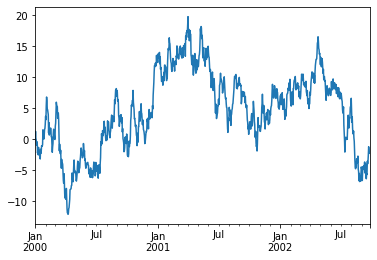

In [135]:
ts.plot()

On a DataFrame, the [`plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot) method is a convenience to plot all of the columns with labels:

In [136]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)

In [137]:
df = df.cumsum()

In [138]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

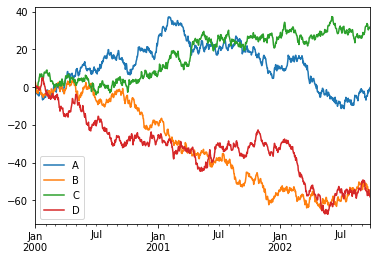

In [139]:
df.plot()

No handles with labels found to put in legend.


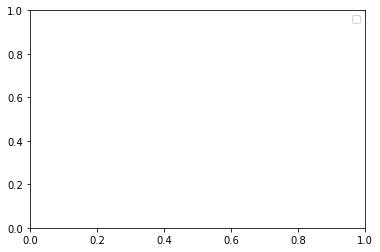

In [140]:
plt.legend(loc='best')

## Getting data in/out

### CSV

[Writing to a csv file](https://pandas.pydata.org/docs/user_guide/io.html#io-store-in-csv).

In [141]:
df.to_csv("foo.csv")

[Reading from a csv file](https://pandas.pydata.org/docs/user_guide/io.html#io-read-csv-table).

In [142]:
pd.read_csv("foo.csv")

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.274170,2.634236,-0.801828,0.195919
1,2000-01-02,-0.311202,2.217280,-0.777134,0.602644
2,2000-01-03,-0.137208,0.388642,-0.219869,0.590772
3,2000-01-04,-1.067340,-0.555138,-0.183437,-0.108575
4,2000-01-05,-3.103741,-1.787616,-0.203873,0.334357
...,...,...,...,...,...
995,2002-09-22,-2.329282,-55.412909,31.494279,-54.356796
996,2002-09-23,-1.790820,-56.896873,31.403469,-57.424781
997,2002-09-24,-0.924477,-56.136062,31.142101,-56.662016
998,2002-09-25,-1.898749,-55.182706,31.150205,-57.228624


### HDF5

Reading and writing to [HDFStores](https://pandas.pydata.org/docs/user_guide/io.html#io-hdf5).

Writing to a HDF5 Store.

In [143]:
df.to_hdf("foo.h5", "df")

Reading from a HDF5 Store.

In [144]:
pd.read_hdf("foo.h5", "df")

,A,B,C,D
2000-01-01,0.274170,2.634236,-0.801828,0.195919
2000-01-02,-0.311202,2.217280,-0.777134,0.602644
2000-01-03,-0.137208,0.388642,-0.219869,0.590772
2000-01-04,-1.067340,-0.555138,-0.183437,-0.108575
2000-01-05,-3.103741,-1.787616,-0.203873,0.334357
...,...,...,...,...
2002-09-22,-2.329282,-55.412909,31.494279,-54.356796
2002-09-23,-1.790820,-56.896873,31.403469,-57.424781
2002-09-24,-0.924477,-56.136062,31.142101,-56.662016
2002-09-25,-1.898749,-55.182706,31.150205,-57.228624


### Excel

Reading and writing to [MS Excel](https://pandas.pydata.org/docs/user_guide/io.html#io-excel).

Writing to an excel file.

In [145]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")

Reading from an excel file.

In [146]:
pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.274170,2.634236,-0.801828,0.195919
1,2000-01-02,-0.311202,2.217280,-0.777134,0.602644
2,2000-01-03,-0.137208,0.388642,-0.219869,0.590772
3,2000-01-04,-1.067340,-0.555138,-0.183437,-0.108575
4,2000-01-05,-3.103741,-1.787616,-0.203873,0.334357
...,...,...,...,...,...
995,2002-09-22,-2.329282,-55.412909,31.494279,-54.356796
996,2002-09-23,-1.790820,-56.896873,31.403469,-57.424781
997,2002-09-24,-0.924477,-56.136062,31.142101,-56.662016
998,2002-09-25,-1.898749,-55.182706,31.150205,-57.228624


## Gotchas

If you are attempting to perform an operation you might see an exception like:

```python
if pd.Series([False, True, False]):
    print("I was true")
```
```
Traceback
    ...
ValueError: The truth value of an array is ambiguous. Use a.empty, a.any() or a.all().
```

See [Comparisons](https://pandas.pydata.org/docs/user_guide/basics.html#basics-compare) for an explanation and what to do.

See [Gotchas](https://pandas.pydata.org/docs/user_guide/gotchas.html#gotchas) as well.